<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/OCR_Translate_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

     |████████████████████████████████| 48.4MB 63kB/s 


In [2]:
!pip install googletrans

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 942kB 7.7MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 102kB 9.7MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=50b788e5b8aabc779419fbe4b6c875fc2f912796b7c4cec091ac7c357eeee6e6
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=8be5acdfe7a57da18826776c2ef2900ef40b56bb0d390fb74640bd690906e0fc
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [3]:
!pip install gTTS

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=3db62640a702a7ad102ff75e8461ccd2ec509cf5da5097cd24aeffd39a553e24
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [4]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2020-08-14 20:35:46--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.26.34, 104.16.28.34, 104.16.2.35, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.26.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg’

mk1jX.jpg           100%[===================>]  44.12K  --.-KB/s    in 0s      

2020-08-14 20:35:46 (137 MB/s) - ‘mk1jX.jpg’ saved [45178/45178]



In [5]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [9]:
reader= easyocr.Reader(['ta'])
translator = Translator()

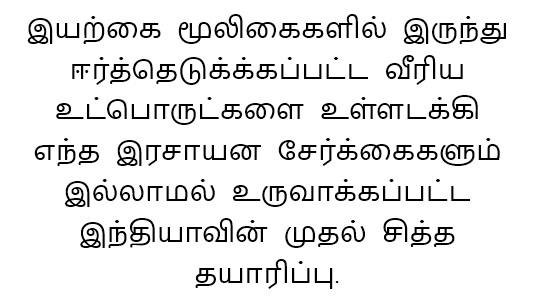

In [7]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open('mk1jX.jpg')
im

In [12]:
bounds = reader.readtext('mk1jX.jpg',add_margin=0.55,width_ths=0.7,link_threshold=0.8,decoder='beamsearch',blocklist='=-')
bounds

[([[32, 0], [532, 0], [532, 70], [32, 70]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.1882287859916687),
 ([[49, 29], [489, 29], [489, 110], [49, 110]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.032601311802864075),
 ([[38, 77], [324, 77], [324, 146], [38, 146]],
  'உட்பொருட்களை ',
  0.18306024372577667),
 ([[304, 78], [496, 78], [496, 140], [304, 140]],
  'உள்ளடக்கி',
  0.4530632793903351),
 ([[14, 118], [523, 118], [523, 188], [14, 188]],
  'எந்த இரசாயன சேர்க்கைகளும்',
  0.05448485538363457),
 ([[71, 156], [491, 156], [491, 229], [71, 229]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.647240936756134),
 ([[60, 195], [478, 195], [478, 272], [60, 272]],
  'இந்தியாவின் முதல் சித்த',
  0.429709792137146),
 ([[174, 237], [359, 237], [359, 303], [174, 303]],
  'தயாரிப்பு',
  0.15375301241874695)]

In [20]:
def draw_boxes(image,bounds,color='yellow',width=2):
  draw= ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0], fill=color,width=width)
  return image

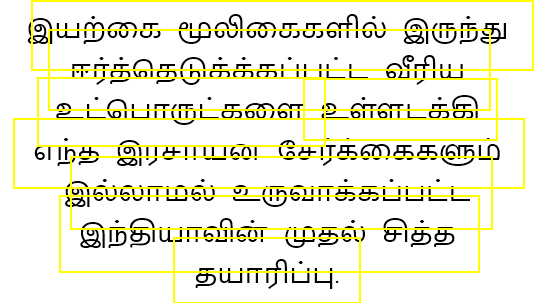

In [21]:
draw_boxes(im,bounds)

In [33]:
text_list = reader.readtext('mk1jX.jpg',add_margin=0.55,width_ths=0.7,link_threshold=0.8,decoder='beamsearch',blocklist='=-',detail=0)
list(text_list)

['இயற்கை மூலிகைகளில் இருந்து',
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உட்பொருட்களை ',
 'உள்ளடக்கி',
 'எந்த இரசாயன சேர்க்கைகளும்',
 'இல்லாமல் உருவாக்கப்பட்ட',
 'இந்தியாவின் முதல் சித்த',
 'தயாரிப்பு']

In [34]:
text_comb=' '.join(text_list)
text_comb

'இயற்கை மூலிகைகளில் இருந்து ஈர்த்தெடுக்க்கப்பட்ட வீரிய உட்பொருட்களை  உள்ளடக்கி எந்த இரசாயன சேர்க்கைகளும் இல்லாமல் உருவாக்கப்பட்ட இந்தியாவின் முதல் சித்த தயாரிப்பு'

In [35]:
print(translator.detect(text_comb))

Detected(lang=ta, confidence=1.0)


In [38]:
text_en= translator.translate(text_comb,src='ta')
print(text_en)

Translated(src=ta, dest=en, text=India's first paranormal product made without any chemical additives containing active ingredients extracted from natural herbs, pronunciation=None, extra_data="{'translat...")


In [42]:
ta_tts=gTTS(text_en.text)
ta_tts.save('trans.mp3')

In [43]:
Audio('trans.mp3',autoplay=True)